שם התלמיד

.......................................................

# Feature scaling

## Goals
In this lab you will:
- Utilize  the multiple variables routines developed in the previous lab
- run Gradient Descent on a data set with multiple features
- improve performance of gradient descent by *feature scaling* using z-score normalization

## Tools
You will utilize the functions developed in the last lab as well as matplotlib and NumPy.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
np.set_printoptions(precision=2)


## Notation

|General <br />  Notation  | Description| Python (if applicable) |
|: ------------|: ------------------------------------------------------------||
| $a$ | scalar, non bold                                                      ||
| $\mathbf{a}$ | vector, bold                                                 ||
| $\mathbf{A}$ | matrix, bold capital                                         ||
| **Regression** |         |    |     |
|  $\mathbf{X}$ | training example maxtrix                  | `X_train` |   
|  $\mathbf{y}$  | training example  targets                | `y_train`
|  $\mathbf{x}^{(i)}$, $y^{(i)}$ | $i_{th}$Training Example | `X[i]`, `y[i]`|
| m | number of training examples | `m`|
| n | number of features in each example | `n`|
|  $\mathbf{w}$  |  parameter: weight,                       | `w`    |
|  $b$           |  parameter: bias                                           | `b`    |     
| $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ | The result of the model evaluation at  $\mathbf{x}^{(i)}$ parameterized by $\mathbf{w},b$: $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)}+b$  | `f_wb` |
|$\frac{\partial J(\mathbf{w},b)}{\partial w_j}$| the gradient or partial derivative of cost with respect to a parameter $w_j$ |`dj_dw[j]`|
|$\frac{\partial J(\mathbf{w},b)}{\partial b}$| the gradient or partial derivative of cost with respect to a parameter $b$| `dj_db`|

#  Problem Statement

As in the previous labs, you will use the motivating example of housing price prediction. The training data set contains many examples with 4 features (size, bedrooms, floors and age) shown in the table below. Note, in this lab, the Size feature is in sqft while earlier labs utilized 1000 sqft.  This data set is larger than the previous lab.

We would like to build a linear regression model using these values so we can then predict the price for other houses - say, a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old.

##  Dataset:
| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|----------------------- |  
| 952             | 2                   | 1                | 65           | 271.5                  |  
| 1244            | 3                   | 2                | 64           | 232                    |  
| 1947            | 3                   | 2                | 17           | 509.8                  |  
| ...             | ...                 | ...              | ...          | ...                    |


In [ ]:
# העלאת הקובץ:
# house_prices_dataset.csv
from google.colab import files
uploaded = files.upload()

Saving house_prices_dataset.csv to house_prices_dataset.csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['house_prices_dataset.csv']))
df.head(5)

,Size (sqft),Number of Bedrooms,Number of Floors,Age of Home,Price (1000s dollars)
0,2969.660768,3,3,29,609.932154
1,3718.352149,5,3,3,795.670430
2,3212.435192,4,1,74,598.487039
3,2951.974323,4,3,84,556.394865
4,2406.446597,2,2,65,446.289319


In [ ]:
columns_names = df.columns
print(columns_names)

Index(['Size (sqft)', 'Number of Bedrooms', 'Number of Floors', 'Age of Home',
       'Price (1000s dollars)'],
      dtype='object')


# תרגיל 1

צרו את מטריצת המאפיינם

X_train

באמצעות מחיקת העמודה האחרונה המכילה את מחיר הבית

צרו את וקטור מחירי הבית

y_tarin


In [2]:
# Extracting the features and target variable into separate numpy arrays
# YOUR CODE HERE
#X_train =

#y_train =

הרץ אה הקוד הבא למציאת המימדים
הפלט הצפוי:

The shape of x_train is: (200, 4)

The shape of y_train is:  (200,)

Number of training examples (m): 200

In [ ]:
print ('The shape of x_train is:', X_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(X_train))

The shape of x_train is: (200, 4)
The shape of y_train is:  (200,)
Number of training examples (m): 200


Let's view the dataset and its features by plotting each feature versus price.

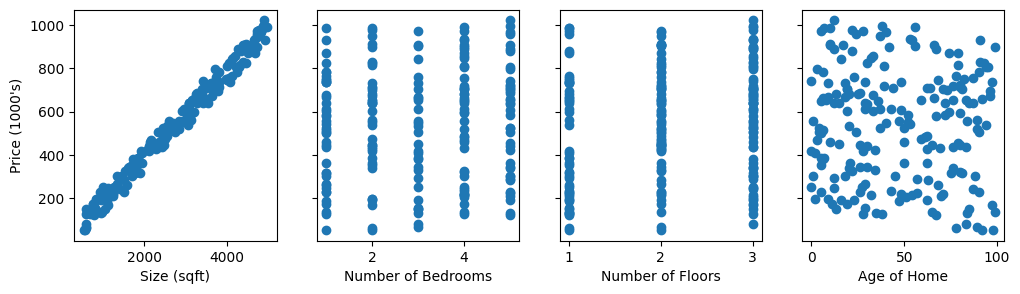

In [ ]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(columns_names[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

Plotting each feature vs. the target, price, provides some indication of which features have the strongest influence on price. Above, increasing size also increases price. Bedrooms and floors don't seem to have a strong impact on price. Newer houses have higher prices than older houses.

<a name="toc_15456_5"></a>
## Gradient Descent With Multiple Variables
Here are the equations you developed in the last lab on gradient descent for multiple variables.:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j = 0..n-1}\newline
&b\ \ := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


# תרגיל 2
ממשו את הפונקציות הבאות:

compute_cost

run_gradient_descent


In [ ]:
def compute_cost(X, y, w, b):
    #YOUR CODE HERE
    return cost

In [ ]:
def run_gradient_descent(X, y, num_iters, alpha):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    w_hist = np.zeros((num_iters, n))
    b_hist = np.zeros(num_iters)
    j_hist = np.zeros(num_iters)

    for i in range(num_iters):

        # YOUR CODE STAT HERE

        # calculate -> y_pred = ???
        # calculate -> loss = ???

        # Gradient calculation: dw,db

        # calculate -> dw = ???
        # calculate -> db = ???

        # Update parameters w,b
        # calculate -> w = ???
        # calculate -> b = ???
        # YOUR CODE END HERE

        # Save w, b and the cost J at each iteration
        w_hist[i, :] = w
        b_hist[i] = b
        j_hist[i] = compute_cost(X, y, w, b)

    return w_hist, b_hist, j_hist


## Feature Scaling

The lectures described the importance of rescaling the dataset so the features have a similar range. There are several thechnics:

- Mean normalization: $x_i := \dfrac{x_i - \mu_i}{max - min} $
- Z-score normalization which we will explore below.


### z-score normalization
After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag{4}$$
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{5}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \tag{6}
\end{align}
$$

>**Implementation Note:** When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters
from the model, we often want to predict the prices of houses we have not
seen before. Given a new x value (living room area and number of bed-
rooms), we must first normalize x using the mean and standard deviation
that we had previously computed from the training set.



# תרגיל 3
**Z-SCORE Implementation**

In [ ]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column

    Args:
      X (ndarray (m,n))     : input data, m examples, n features

    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # YOUR CODE START HERE
    # find the mean of each column/feature - mu will have shape (n,)
    # calculate -> mu =
    # find the standard deviation of each column/feature - sigma will have shape (n,)
    # calculate -> sigma =
    # element-wise, subtract mu for that column from each example, divide by std for that column
    # calculate -> X_norm =
    # YOUR CODE END HERE
    return (X_norm, mu, sigma)

Let's look at the steps involved in Z-score normalization. The plot below shows the transformation step by step.

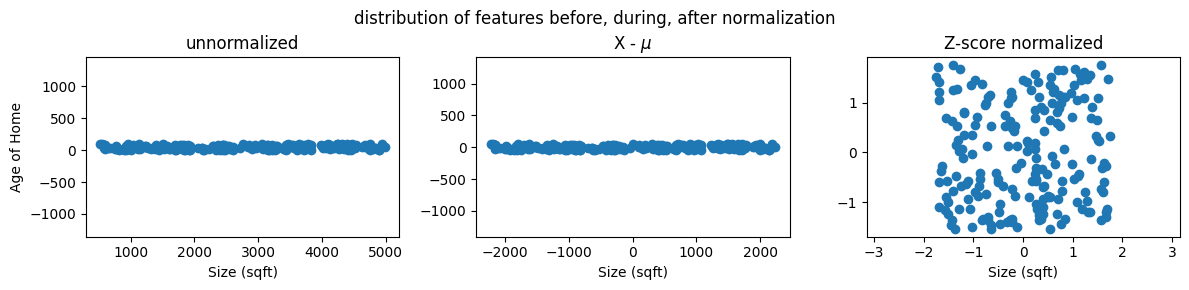

In [ ]:
mu     = np.mean(X_train,axis=0)
sigma  = np.std(X_train,axis=0)
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(columns_names[0]); ax[0].set_ylabel(columns_names[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(columns_names[0]); ax[0].set_ylabel(columns_names[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(columns_names[0]); ax[0].set_ylabel(columns_names[3]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

The plot above shows the relationship between two of the training set parameters, "age" and "size(sqft)". *These are plotted with equal scale*.
- Left: Unnormalized: The range of values or the variance of the 'size(sqft)' feature is much larger than that of age
- Middle: The first step removes the mean or average value from each feature. This leaves features that are centered around zero. It's difficult to see the difference for the 'age' feature, but 'size(sqft)' is clearly around zero.
- Right: The second step divides by the variance. This leaves both features centered at zero with a similar scale.

Let's normalize the data and compare it to the original data.

In [ ]:
# normalize the original features
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [2.75e+03 3.03e+00 2.11e+00 4.62e+01], 
X_sigma = [1.28e+03 1.45e+00 7.92e-01 3.01e+01]
Peak to Peak range by column in Raw        X:[4.47e+03 4.00e+00 2.00e+00 9.90e+01]
Peak to Peak range by column in Normalized X:[3.5  2.77 2.52 3.29]


The peak to peak range of each column is reduced from a factor of thousands to a factor of 2-3 by normalization.

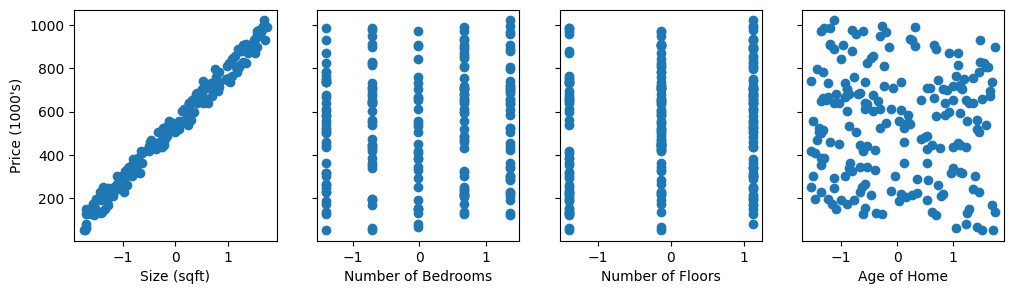

In [ ]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_norm[:,i],y_train)
    ax[i].set_xlabel(columns_names[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

Notice, above, the range of the normalized data (x-axis) is centered around zero and roughly +/- 2. Most importantly, the range is similar for each feature.

Let's re-run our gradient descent algorithm with normalized data.
Note the **vastly larger value of alpha**. This will speed up gradient descent.

In [ ]:
w_norm, b_norm, hist = run_gradient_descent(X_norm, y_train, 1000, 1.0e-1, )

In [ ]:
import matplotlib.pyplot as plt

def plot_cost_i_w(w_hist, b_hist, hist):
    """
    Plots the history of weights, bias, and cost function over iterations.

    Parameters:
    w_hist (list of numpy.ndarray): History of weights over iterations.
    b_hist (list): History of bias over iterations.
    hist (numpy.ndarray): History of the cost function values.
    """
    plt.figure(figsize=(15, 10))

    # Plotting the weights
    for i in range(w_hist.shape[1]):
        plt.subplot(3, 3, i+1)  # 3x3 grid, position i+1
        plt.plot([w[i] for w in w_hist], label=f'w[{i}]')
        plt.xlabel('Number of Iterations')
        plt.ylabel(f'Value of w[{i}]')
        plt.title(f'History of w[{i}] over Iterations')
        plt.legend()

    # Plotting the bias
    plt.subplot(3, 3, w_hist.shape[1]+1)  # 3x3 grid, position 6
    plt.plot(b_hist, label='Bias')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Value of Bias')
    plt.title('History of Bias over Iterations')
    plt.legend()

    # Plotting the cost function history
    plt.subplot(3, 3, w_hist.shape[1]+2)  # 3x3 grid, position 7
    plt.plot(hist, label='Cost Function History')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost Function Value')
    plt.title('Cost Function History over Iterations')
    plt.legend()

    plt.tight_layout()
    plt.show()




The scaled features get very accurate results **much, much faster!**. Notice the gradient of each parameter is tiny by the end of this fairly short run. A learning rate of 0.1 is a good start for regression with normalized features.
Let's plot our predictions versus the target values. Note, the prediction is made using the normalized feature while the plot is shown using the original feature values.

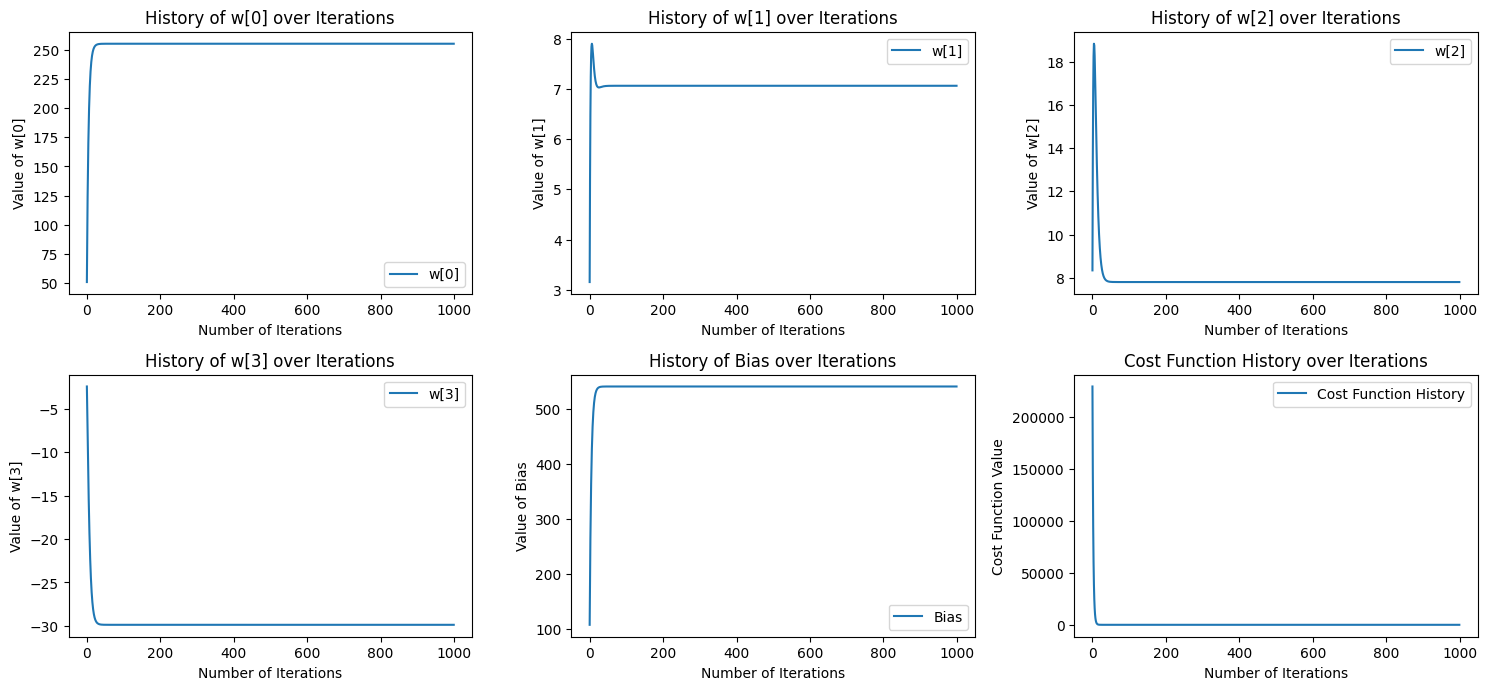

In [ ]:
plot_cost_i_w(w_norm, b_norm, hist)

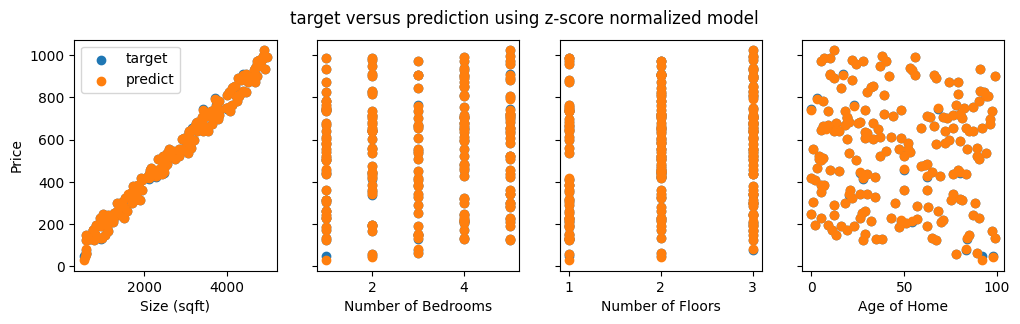

In [ ]:
#predict target using normalized features
w_norm_final = w_norm[-1,:]
b_norm_final = b_norm[-1]
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_norm_final) + b_norm_final

    # plot predictions and targets versus original features
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(columns_names[i])
    ax[i].scatter(X_train[:,i],yp, label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

The results look good. A few points to note:
- with multiple features, we can no longer have a single plot showing results versus features.
- when generating the plot, the normalized features were used. Any predictions using the parameters learned from a normalized training set must also be normalized.

# תרגיל 4

**Prediction**
The point of generating our model is to use it to predict housing prices that are not in the data set. Let's predict the price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old. Recall, that you must normalize the data with the mean and standard deviation derived when the training data was normalized.

וקטור המאפיינים לאחר הרמול הוא:

[-1.21 -0.02 -1.4  -0.21]

עלות הבית הצפוי לנתונים האלה הוא:

$225591

In [ ]:
# YOUR CODE HERE
# First, normalize out example.
# x_house = ???
# x_house_norm = ???
print(x_house_norm)
#x_house_predict = ???
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${x_house_predict*1000:0.0f}")

[-1.21 -0.02 -1.4  -0.21]
 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $225591



## Congratulations!
In this lab you:
- utilized the routines for linear regression with multiple features you developed in previous labs
- discovered the value of feature scaling using z-score normalization in speeding convergence

Credit to: Coursera-Supervised Machine Learning: Regression and Classification

Modified by: Merav Varsano Maala